<a href="https://colab.research.google.com/github/yokabicarpmaz/ME462_ControlSystemsTools/blob/master/Control_Actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTROL ACTIONS AND CONTROLLERS**

Let's start with adding necessary libraries !


Do NOT forget to run codes in order !

In [0]:
try :
  !pip install control
  !pip install cowsay
  import control as cnt
  import matplotlib.pyplot as plt
  import numpy as np
  import sympy as sy
  import math
  import cowsay
  import ipywidgets as widgets
  from IPython.display import display
  cowsay.daemon("All libraries have been successfully downloaded!")
except : 
   print("\033[1m"+"WARNING!!!LIBRARIES COULD NOT BE DOWNLOADED. PLEASE TRY AGAIN !"+"\033[0m")


**What is the controller?**

  It is **a device or an algorithm** that works to maintain the value of the controlled variable at set point.

<figure>
<center>
<img src='https://res.cloudinary.com/tbmg/image/upload/c_scale,w_650/c_limit,w_750/f_auto,q_auto/v1502862890/tb/articles/2014/features/49747-121_fig1.png' />
<figcaption>Figure 1</figcaption></center>

As shown in *Figure 1*, it is a manual type control and controller is the operator. He checks the temperature gauge and adjusts the flow with hand valve to get desired temperature value. 

<figure>
<img src='https://res.cloudinary.com/tbmg/image/upload/c_scale,w_650/c_limit,w_750/f_auto,q_auto/v1502862890/tb/articles/2014/features/49747-121_fig2.png' />
<center><figcaption>Figure 2</figcaption>



 



As shown in *Figure 2* , it is automatic control. The controller takes the difference between desired value and sensor value accordingly it adjusts the flow with signals.

The purpose of a controller is **to produce a signal that is suitable as input to the controlled plant or process.**

It is responsible for **the performance of the control system.** 


**What is the basic working principle?**

The controller receives the difference between the reference input and the measured output (known as error) and generates **a control action to make the error to zero**. The generated control action manipulates the process variable closer to setpoint. 

<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624913_78ce6fb57f_b.jpg' /><figcaption>Figure 3</figcaption>
</center>




The input to the controller is the **actuating error $E_a(s)$**, which is the difference between  


*   the system response B(s), as measured by a sensor,
*   the reference signal R(s), which represents the desired system response.

**What is the control action?**

The **algoritm** that relates the actuating error and the control signal is called the **control action**.

The most common **control actions** are:

*   **Proportional** (P-control)
*   **Derivative** (D-control)
*   **Integral** (I-control)




**Proportional Control (P-Control)**

The proportional control mode changes the controller output in proportion to the error. If the error increases, the control action increases proportionally.

When an error is detected, the P controller takes **immediate corrective action**.

<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905140431_1e612733f6_b.jpg' /><figcaption>Figure 4</figcaption>
</center>


<center>$K_p$ is the proportional gain.

$m(t) = K_{p}e_{a}(t)$

$\frac {M(s)}{E_{a}(s)}=K_{p}$



A proportional controller is essentially **an amplifier with an adjustable gain.** 

The value of $K_{p}$ should be selected to satisfy the requirements of 


*   Stability
*   Accuracy
*   Satisfactory transient response
*   Satisfactory disturbance rejection characteristics

In general,


*   **For small values of $K_p$**, the corrective **action is slow** particularly for small errors.
*   **For large values of $K_p$**, the performance of the control system is improved. But this may lead to **instability**. 

Usually, a compromise is necessary in selecting proper gain. If this is not possible, then proportional control action is **used with some other control actions**.






---
Example-1 (P control - step response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904662963_952f3e8120_b.jpg' />
</center> 
<center>
<figcaption>Figure 5</figcaption><center>



The transfer function of the unity feedback closed-loop control system is 
$TF=\frac{K_{p}G(s)}{1+K_{p}G(s)}$

Then the transfer function of the system in Figure 5 is 
<center>
$TF=\frac{K_{p}}{5s^2+3s+2+K_{p}}$

**Let's observe the response of the system for different values of Kp and compare the result with uncontrolled system.**

Once you run the next code block, there is no need to do it again. You can simply play with slider.

In [0]:
def p_control(Kp):
  num = [1]
  den = [5,3,2]
  TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
  num = [Kp]
  den = [5, 3, Kp+2]
  TF2 = cnt.tf(num,den)   #Transfer function of P-controlled system
  print("G(s)=",TF1)
  print("G(s)=",TF2)
  #Response vs. Time Plot
  t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
  t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
  t,x2 = cnt.step_response(TF2,t)
  plt.plot(t,x1, label ="uncontrolled")
  plt.plot(t,x2, label = "P-control")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.xlabel("Time [s]")
  plt.ylabel("Step Response")
  plt.title("Step Response vs. Time")
  plt.grid(True)
  plt.show()


Kp_slider = widgets.FloatSlider(value=1.2, min=0,max=3.0,step=0.1)
plot = widgets.interact(p_control, Kp=Kp_slider)

The **fly-ball governor** is an early classic example of proportional control. The balls rise as speed increases, which closes the valve, until a balance is achieved between demand and the proportional gain of the linkage and valve as shown in *Figure 6*.


<figure>
<center>
<img src='https://thumbs.gfycat.com/PiercingAllAsianwaterbuffalo-size_restricted.gif' />
<center><figcaption>Figure 6</figcaption>

if you want to see the working principle in detail, the following link will help:    
https://youtu.be/HS_YGZXP2xY

**Integral Control (I-Control)**

With this type of control action, control signal is **propotional to the integral of the error signal**.

The value of an integral controller is directly proportional to **the history of the error**. Since it uses the error history, it will respond more **slowly** to the current error than the P controller.

<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905140371_6916168f85_b.jpg' /><figcaption>Figure 7</figcaption>
</center>


<center>$K_i$ is the integral gain.

$m(t) = K_{i}\int {e_{a}(t)}dt$


$\frac {M(s)}{E_{a}(s)}=\frac{K_{i}}{s}$



*   It is obvious that even a small error can be detected, since integral control produces a control signal proportional to the area under the error signal. Hence, **it increases the accuracy of the system**.

*   For **zero error signal**, the integral control may still produce a constant control signal which may in turn lead to **instability**.





---
Example-1 (I control - step response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905140096_eeaaaa93ca_b.jpg' />
</center> 
<center>
<figcaption>Figure 8</figcaption><center>



<center>The transfer function of the system in Figure 8 is<center>
<center>
$TF=\frac{K_{i}}{5s^3+3s^2+2+K_{i}}$

**Let's observe the response of the system for different values of Ki and compare the result with uncontrolled system.**

In [0]:
print("Change the Ki value with slider")
Ki = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Ki)

Change the Ki value with slider


FloatSlider(value=1.2, max=3.0)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

G(s)= 
       1
---------------
5 s^2 + 3 s + 2

G(s)= 
           1.2
-------------------------
5 s^3 + 3 s^2 + 2 s + 1.2



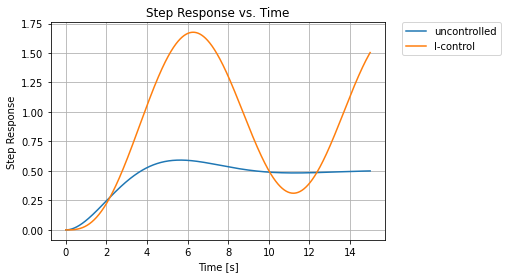

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Ki.value]
den = [5, 3, 2, Ki.value]
TF2 = cnt.tf(num,den)   #Transfer function of I-controlled system
print("G(s)=",TF1)
print("G(s)=",TF2)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "I-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Step Response")
plt.title("Step Response vs. Time")
plt.grid(True)
plt.show()

**Derivative Control (D-Control)**

In this case, the control signal of the controller is proportional to the **derivative(slope) of the error signal**.

You can think of derivative control as **a crude prediction of the error in the future**, based on the current slope of the error. How far into the future? That’s what the derivative time is for.



<center>$K_d$ is the derivative gain.

$m(t) = K_{d} \frac{de_{a}(t)}{dt}$

$\frac {M(s)}{E_{a}(s)}=K_{d}s$
<center>






*   Derivative control action responds to the rate of change of error signal and can produce a control signal before **the error becomes too large**.

*   As such, derivative control action **anticipates the error**, takes early corrective action, and tends to **increase the stability** of the system. 

*   It has no direct effect on steady state error.

*   But it **increases the damping** in the system and allows to **higher value for the open loop gain K** which reduces the steady-state error.

*   It amplifies noise signals coming in with the error signal and may saturate the actuator.

*   It cannot be used if the error signal is not differentiable.

*   **Thus derivative control action is never used alone.**



---
Example-1 (D control - step response) In this example, the derivative control action is used to discover its effect on the system, although **it is not used alone**.


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624558_485b03856b_b.jpg' />
</center> 
<center>
<figcaption>Figure 9</figcaption><center>



<center>The transfer function of the system in Figure 9 is<center>
<center>
$TF=\frac{K_{d}s}{5s^2+(3+K_{d})s+2}$

**Let's observe the response of the system for different values of Kd and compare the result with uncontrolled system.**

In [0]:
print("Change the Kd value with slider")
Kd = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kd)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kd.value, 0]
den = [5, 3+Kd.value, 2]
TF2 = cnt.tf(num,den)   #Transfer function of D-controlled system
print("G(s)=",TF1)
print("G(s)=",TF2)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "D-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Step Response")
plt.title("Step Response vs. Time")
plt.show()

**Proportional-Integral (PI) Controller**

The PI controller combines the **strengths of the P and I controllers**. It removes the basic problem of the plain P controller, since in the long run the I controller removes the steady-state error. The P part on the other hand fixes the problem of the slow, sluggish I controller, because it acts quickly.

<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624848_eb7b345ede_b.jpg' /><figcaption>Figure 10</figcaption>
</center>


The PI controller is commonly used in process control, where the response does not need to be as fast as for example in motor control. When a radar is tracking a satellite, it needs to predict the satellite’s trajectory. Therefore, the controller needs derivative (D) action, an I controller
only slows down the response.





---
Example-1 (PI control - step response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624698_a43becdcbb_b.jpg' />
</center> 
<center>
<figcaption>Figure 11</figcaption><center>


<center>The transfer function of the system in Figure 11 is<center>
<center>
$TF=\frac{K_{p}s+K_{i}}{5s^3+3s^2+(2+K_{p})s+K_{i}}$

**Let's observe the response of the system for different Kp, Ki values and compare the result with uncontrolled system.**

In [0]:
print("Change the Kp value with slider")
Kp = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kp)

In [0]:
print("Change the Ki value with slider")
Ki = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Ki)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kp.value, Ki.value]
den = [5, 3, 2+Kp.value, Ki.value]
TF2 = cnt.tf(num,den)   #Transfer function of PI-controlled system
print("G(s)=",TF1)
print("G(s)=",TF2)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "PI-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Step Response")
plt.title("Step Response vs. Time")
plt.show()

**Proportional-Derivative (PD) Controller**

The derivative controller is hardly ever used alone. Instead, it is combined with a P controller(or with both P and I controllers) and applied in situations where **a very fast response** is required.

*   When PD controllers are properly used, they **increase the stability** of a system. 


<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624793_57b253b798_b.jpg' /><figcaption>Figure 12</figcaption>
</center>




A well-known example of this is **balancing a broom handle** as shown in *Figure 13*, which is set on your palm. This is also called the inverted pendulum problem. With a little bit of practice, the hand–eye coordination produces the desired result. The eyes will follow the angle of deflection, but this is not enough, also the angular speed (and direction) of the broom’s top end has to be used. This is exactly what a PD controller does.

<figure>
<center>
<img src='https://www.exploratorium.edu/sites/default/files/BalancingStick_DSC_8160_Hv3.jpg' />
</center><center><figcaption>Figure 13</figcaption>




---
Example-1 (PD control - step response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905441182_341fc18747_b.jpg' />
</center> 
<center>
<figcaption>Figure 14</figcaption><center>


<center>The transfer function of the system in Figure 14 is<center>

<center>
$TF=\frac{K_{d}s+K_{p}}{5s^2+(3+K_{d})s+2+K_{p}}$

**Let's observe the response of the system for different Kp, Kd values and compare the result with uncontrolled system.**

In [0]:
print("Change the Kp value with slider")
Kp = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kp)

In [0]:
print("Change the Kd value with slider")
Kd = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kd)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kd.value, Kp.value]
den = [5, 3+Kd.value, 2+Kp.value]
TF2 = cnt.tf(num,den)   #Transfer function of PD-controlled system
print("G(s)=",TF1)
print("G(s)=",TF2)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "PD-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Step Response")
plt.title("Step Response vs. Time")
plt.show()

**Proportional-Integral-Derivative (PID) Controller**

Until now we have discussed P, PI, and PD controllers. A PID controller contains all the best features of these. 

<figure>
<center>
<img src='https://live.staticflickr.com/65535/49904624773_0c4ded2b0a_b.jpg' /><figcaption>Figure 15</figcaption>
</center>






---
Example-1 (PID control - step response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905140201_e981b71f8e_b.jpg' />
</center> 
<center>
<figcaption>Figure 16</figcaption><center>


<center>The transfer function of the system in Figure 16 is<center>
<center>
$TF=\frac{K_{d}s^2+K_{p}s+K_{i}}{5s^3+(3+K_{d})s^2+(2+K_{p})s+K_{i}}$

**Let's observe the response of the system for different Kp, Ki, Kd values and compare the result with uncontrolled system.**

In [0]:
print("Change the Kp value with slider")
Kp = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kp)

In [0]:
print("Change the Ki value with slider")
Ki = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Ki)

In [0]:
print("Change the Kd value with slider")
Kd = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kd)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kd.value, Kp.value, Ki.value]
den = [5, 3+Kd.value, 2+Kp.value, Ki.value]
TF2 = cnt.tf(num,den)   #Transfer function of PID-controlled system
print("G(s)=",TF1)
print("G(s)=",TF2)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #step response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "PID-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Step Response")
plt.title("Step Response vs. Time")
plt.show()

The autonomous vehicle as shown in *Figure 17* is a mobile robot integrating multi-sensor navigation and positioning, intelligent decision making and control technology. It is one of the most significant examples that has PID controller. 


<figure>
<center>
<img src='https://i1.wp.com/electrek.co/wp-content/uploads/sites/3/2016/12/tesla-self-driving-gif-1.gif?w=538&h=303&quality=82&strip=all&ssl=1' />
</center><center><figcaption>Figure 17</figcaption>

**If you want to have further insight and to wrap up the task, it is highly recommended to watch these videos :** 

https://youtu.be/4Y7zG48uHRo

https://youtu.be/fusr9eTceEo



---
Example-1 (P - PI - PD - PID control - impulse response)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905139941_ca49c4851f_b.jpg' />
</center> 
<center>
<figcaption>Figure 18</figcaption><center>


**Let's observe the response of the system for different Kp, Ki, Kd values and compare the result with uncontrolled system.**

In [0]:
print("Change the Kp value with slider")
Kp = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kp)

In [0]:
print("Change the Ki value with slider")
Ki = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Ki)

In [0]:
print("Change the Kd value with slider")
Kd = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kd)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [5,3,2]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kp.value]
den = [5, 3, Kp.value+2]
TF2 = cnt.tf(num,den)   #Transfer function of P-controlled system
num = [Kp.value, Ki.value]
den = [5, 3, 2+Kp.value, Ki.value]
TF3 = cnt.tf(num,den)   #Transfer function of PI-controlled system
num = [Kd.value, Kp.value]
den = [5, 3+Kd.value, 2+Kp.value]
TF4 = cnt.tf(num,den)   #Transfer function of PD-controlled system
num = [Kd.value, Kp.value, Ki.value]
den = [5, 3+Kd.value, 2+Kp.value, Ki.value]
TF5 = cnt.tf(num,den)   #Transfer function of PID-controlled system
print("G_1(s)=",TF1)
print("G_2(s)=",TF2)
print("G_3(s)=",TF3)
print("G_4(s)=",TF4)
print("G_5(s)=",TF5)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.impulse_response(TF1,t)   #impulse response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.impulse_response(TF2,t)
t,x3 = cnt.impulse_response(TF3,t)
t,x4 = cnt.impulse_response(TF4,t)
t,x5 = cnt.impulse_response(TF5,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "P-control")
plt.plot(t,x3, label = "PI-control")
plt.plot(t,x4, label = "PD-control")
plt.plot(t,x5, label = "PID-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Impulse Response")
plt.title("Impulse Response vs. Time")
plt.show()


---
Example-2 (P - PI - PD - PID control)


---








<figure>
<center>
<img src='https://live.staticflickr.com/65535/49905205316_24b32f2ee7_b.jpg' />
</center> 
<center>
<figcaption>Figure 19</figcaption><center>



**Let's observe the system response and stabiliy with and without controller.**

In [0]:
print("Change the Kp value with slider")
Kp = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kp)

In [0]:
print("Change the Ki value with slider")
Ki = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Ki)

In [0]:
print("Change the Kd value with slider")
Kd = widgets.FloatSlider(value=1.2,min=0,max=3.0,step=0.1)
display(Kd)

Once you run the slider code block, there is no need to do it again. You can simply play with slider.
After changing slider position, you should run the next code block again to get new plot.

In [0]:
num = [1]
den = [1,5,6]
TF1 = cnt.tf(num,den)   #Transfer function of uncontrolled system
num = [Kp.value]
den = [1, 5, Kp.value+6]
TF2 = cnt.tf(num,den)   #Transfer function of P-controlled system
num = [Kp.value, Ki.value]
den = [1, 5, 6+Kp.value, Ki.value]
TF3 = cnt.tf(num,den)   #Transfer function of PI-controlled system
num = [Kd.value, Kp.value]
den = [1, 5+Kd.value, 6+Kp.value]
TF4 = cnt.tf(num,den)   #Transfer function of PD-controlled system
num = [Kd.value, Kp.value, Ki.value]
den = [1, 5+Kd.value, 6+Kp.value, Ki.value]
TF5 = cnt.tf(num,den)   #Transfer function of PID-controlled system
print("G_1(s)=",TF1)
print("G_2(s)=",TF2)
print("G_3(s)=",TF3)
print("G_4(s)=",TF4)
print("G_5(s)=",TF5)
#Response vs. Time Plot
t = np.linspace(0,15,5001)    #time duration between 0 and 5 s divided into 501 points
t,x1 = cnt.step_response(TF1,t)   #impulse response of the system from transfer function where t is the time and x is the response of the system
t,x2 = cnt.step_response(TF2,t)
t,x3 = cnt.step_response(TF3,t)
t,x4 = cnt.step_response(TF4,t)
t,x5 = cnt.step_response(TF5,t)
plt.plot(t,x1, label ="uncontrolled")
plt.plot(t,x2, label = "P-control")
plt.plot(t,x3, label = "PI-control")
plt.plot(t,x4, label = "PD-control")
plt.plot(t,x5, label = "PID-control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Time [s]")
plt.ylabel("Impulse Response")
plt.title("Impulse Response vs. Time")
plt.show()